In [79]:
## imports

import requests
import pandas as pd 
import matplotlib.pyplot as plt
import json
import time
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.compose import ColumnTransformer

# Import CountVectorizer and TFIDFVectorizer from feature_extraction.text.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,TfidfTransformer

### Generating Posts For First Subreddit

In [2]:
## creating a function to pull about 1500 posts

def api_reddit(url, param, pulls, post_list):
    for num in range(int(pulls)):
        print(f"Pulling data attempt number {num +1}")
        
        res = requests.get(url, params = param)
        
        if res.status_code == 200:
            data = res.json()
            post_list.extend(data['data'])
            
            before = data['data'][99]['created_utc']
            param['before'] = before
            
        else:
            print("There has been an error. The code is: ", res.status_code)
            break
            
        time.sleep(2)
    return post_list
            

In [3]:
param = {
    'subreddit': 'PlantBasedDiet',
    'size': 100,
    'selftext:not': '[removed]'}

url = 'https://api.pushshift.io/reddit/search/submission/'

pulls = 45

post_list = []

In [4]:
## calling the function
api_reddit(url, param, pulls, post_list)

Pulling data attempt number 1
Pulling data attempt number 2
Pulling data attempt number 3
Pulling data attempt number 4
Pulling data attempt number 5
Pulling data attempt number 6
Pulling data attempt number 7
Pulling data attempt number 8
Pulling data attempt number 9
Pulling data attempt number 10
Pulling data attempt number 11
Pulling data attempt number 12
Pulling data attempt number 13
Pulling data attempt number 14
Pulling data attempt number 15
Pulling data attempt number 16
Pulling data attempt number 17
Pulling data attempt number 18
Pulling data attempt number 19
Pulling data attempt number 20
Pulling data attempt number 21
Pulling data attempt number 22
Pulling data attempt number 23
Pulling data attempt number 24
Pulling data attempt number 25
Pulling data attempt number 26
Pulling data attempt number 27
Pulling data attempt number 28
Pulling data attempt number 29
Pulling data attempt number 30
Pulling data attempt number 31
Pulling data attempt number 32
Pulling data atte

[{'all_awardings': [],
  'allow_live_comments': False,
  'author': 'lebron2007',
  'author_flair_css_class': None,
  'author_flair_richtext': [],
  'author_flair_text': None,
  'author_flair_type': 'text',
  'author_fullname': 't2_61wf7e0q',
  'author_is_blocked': False,
  'author_patreon_flair': False,
  'author_premium': False,
  'awarders': [],
  'can_mod_post': False,
  'contest_mode': False,
  'created_utc': 1638337315,
  'domain': 'self.PlantBasedDiet',
  'full_link': 'https://www.reddit.com/r/PlantBasedDiet/comments/r67ky9/how_can_i_stay_full_on_a_plant_based_diet_with/',
  'gildings': {},
  'id': 'r67ky9',
  'is_created_from_ads_ui': False,
  'is_crosspostable': True,
  'is_meta': False,
  'is_original_content': False,
  'is_reddit_media_domain': False,
  'is_robot_indexable': True,
  'is_self': True,
  'is_video': False,
  'link_flair_background_color': '',
  'link_flair_richtext': [],
  'link_flair_text_color': 'dark',
  'link_flair_type': 'text',
  'locked': False,
  'media_

In [5]:
len(post_list)

4500

In [6]:
## creating a DF
plant_based = pd.DataFrame(post_list)

In [7]:
## checking the DF
plant_based.head()

all_awardings  allow_live_comments         author author_flair_css_class  \
0            []                False     lebron2007                   None   
1            []                False  leandrabrunet                   None   
2            []                False    slapstikred                   None   
3            []                False   ilikemyface3                   None   
4            []                False   REEEE-Normie                   None   

  author_flair_richtext author_flair_text author_flair_type author_fullname  \
0                    []              None              text     t2_61wf7e0q   
1                    []              None              text     t2_eq1ng982   
2                    []              None              text     t2_4lhc43y1   
3                    []              None              text      t2_q720mj3   
4                    []              None              text     t2_3irxg51l   

  author_is_blocked author_patreon_flair  ... gallery_data is_gallery  \
0             False                False  ...          NaN        NaN   
1             False                False  ...          NaN        NaN   
2             False                False  ...          NaN        NaN   
3             False                False  ...          NaN        NaN   
4             False                False  ...          NaN        NaN   

   media_metadata  author_flair_template_id  author_flair_text_color  \
0             NaN                       NaN                      NaN   
1             NaN                       NaN                      NaN   
2             NaN                       NaN                      NaN   
3             NaN                       NaN                      NaN   
4             NaN                       NaN                      NaN   

  poll_data author_cakeday author_flair_background_color banned_by edited  
0       NaN            NaN                           NaN       NaN    NaN  
1       NaN            NaN                           NaN       NaN    NaN  
2       NaN            NaN                           NaN       NaN    NaN  
3       NaN            NaN                           NaN       NaN    NaN  
4       NaN            NaN                           NaN       NaN    NaN  

[5 rows x 81 columns]

In [8]:
## creating a seperate dataframe with only the columns I need
df_1 = plant_based[['id','subreddit', 'selftext', 'title']]

In [9]:
df_1.duplicated(subset=['selftext']).value_counts()

True     2847
False    1653
dtype: int64

In [10]:
## dropping the duplicates based on selftext but keeping the last occurence of the duplicated row
df_1 = df_1.drop_duplicates(subset=['selftext'], keep ='last')

In [11]:
df_1

id       subreddit  \
0     r67ky9  PlantBasedDiet   
3     r5slcs  PlantBasedDiet   
5     r5o90n  PlantBasedDiet   
6     r5ebza  PlantBasedDiet   
8     r59uc9  PlantBasedDiet   
...      ...             ...   
4489  j59pbd  PlantBasedDiet   
4490  j59ijr  PlantBasedDiet   
4494  j57cfe  PlantBasedDiet   
4498  j54cr0  PlantBasedDiet   
4499  j50a9t  PlantBasedDiet   

                                               selftext  \
0     I am a 32 year old man and I keep trying to im...   
3     I'm looking to transition to a plant-based die...   
5     I promised to myself to switch to a more whole...   
6     I certainly don’t want to start any controvers...   
8       I started a WFPB diet a month ago after I wa...   
...                                                 ...   
4489  I’m a month in to eating plant based, and I ha...   
4490  hi has any one tried the cauliflower cheesecak...   
4494  Looking for a lunch that can stay in a car dur...   
4498                                                      
4499  I’ve been plant based going on four years now ...   

                                                  title  
0     How can I stay full on a plant based diet? Wit...  
3     How do you navigate around people that don't e...  
5     Tips &amp; Tricks for preparation/conservation...  
6              Clearing up confusion about oil + recipe  
8                       Ex - low carb in need of advice  
...                                                 ...  
4489                        Do you eat honey and yeast?  
4490                             cauliflower cheesecake  
4494         Looking for low-maintenance portable lunch  
4498                                     Tomato sashimi  
4499                       Irish Sea moss gel Questions  

[1653 rows x 4 columns]

In [13]:
## saving the df_1 
df_1.to_csv('plantbased_df')

### Generating Posts For Second Subreddit

In [27]:
## creating a function to pull about 1500 posts

def api_reddit(url, param, pulls, post_list):
    for num in range(int(pulls)):
        print(f"Pulling data attempt number {num +1}")
        
        res = requests.get(url, params = param)
        
        if res.status_code == 200:
            data = res.json()
            post_list.extend(data['data'])
            
            before = data['data'][98]['created_utc']
            param['before'] = before
            
        else:
            print("There has been an error. The code is: ", res.status_code)
            break
            
        time.sleep(2)
    return post_list

In [28]:
param = {
    'subreddit': 'nutrition',
    'size': 100,
    'selftext:not': '[removed]'}

url = 'https://api.pushshift.io/reddit/search/submission/'

pulls = 20

post_list = []

In [29]:
api_reddit(url, param, pulls, post_list)

Pulling data attempt number 1
Pulling data attempt number 2
Pulling data attempt number 3
Pulling data attempt number 4
Pulling data attempt number 5
Pulling data attempt number 6
Pulling data attempt number 7
Pulling data attempt number 8
Pulling data attempt number 9
Pulling data attempt number 10
Pulling data attempt number 11
Pulling data attempt number 12
Pulling data attempt number 13
Pulling data attempt number 14
Pulling data attempt number 15
Pulling data attempt number 16
Pulling data attempt number 17
Pulling data attempt number 18
Pulling data attempt number 19
Pulling data attempt number 20


[{'all_awardings': [],
  'allow_live_comments': False,
  'author': 'kuddle_muddle',
  'author_flair_css_class': None,
  'author_flair_richtext': [],
  'author_flair_text': None,
  'author_flair_type': 'text',
  'author_fullname': 't2_4dex3re1',
  'author_is_blocked': False,
  'author_patreon_flair': False,
  'author_premium': False,
  'awarders': [],
  'can_mod_post': False,
  'contest_mode': False,
  'created_utc': 1638347018,
  'domain': 'self.nutrition',
  'full_link': 'https://www.reddit.com/r/nutrition/comments/r6a0na/is_there_such_thing_as_eating_too_many/',
  'gildings': {},
  'id': 'r6a0na',
  'is_created_from_ads_ui': False,
  'is_crosspostable': True,
  'is_meta': False,
  'is_original_content': False,
  'is_reddit_media_domain': False,
  'is_robot_indexable': True,
  'is_self': True,
  'is_video': False,
  'link_flair_background_color': '',
  'link_flair_richtext': [],
  'link_flair_text_color': 'dark',
  'link_flair_type': 'text',
  'locked': False,
  'media_only': False,
 

In [30]:
## creating a DF
nutrition = pd.DataFrame(post_list)

In [31]:
nutrition.head()

all_awardings  allow_live_comments             author  \
0            []                False      kuddle_muddle   
1            []                False    piebalddacshund   
2            []                False       BigBootyBear   
3            []                False           tgorm327   
4            []                False  Estelwaterbottles   

  author_flair_css_class author_flair_richtext author_flair_text  \
0                   None                    []              None   
1                   None                    []              None   
2                   None                    []              None   
3                   None                    []              None   
4                   None                    []              None   

  author_flair_type author_fullname  author_is_blocked author_patreon_flair  \
0              text     t2_4dex3re1              False                False   
1              text     t2_4pl7o2wh              False                False   
2              text        t2_iwnk3              False                False   
3              text     t2_4xp8v2um              False                False   
4              text     t2_4vvs3kim              False                False   

   ... author_flair_background_color author_flair_template_id  \
0  ...                           NaN                      NaN   
1  ...                           NaN                      NaN   
2  ...                           NaN                      NaN   
3  ...                           NaN                      NaN   
4  ...                           NaN                      NaN   

   author_flair_text_color  link_flair_css_class  link_flair_text  \
0                      NaN                   NaN              NaN   
1                      NaN                   NaN              NaN   
2                      NaN                   NaN              NaN   
3                      NaN                   NaN              NaN   
4                      NaN                   NaN              NaN   

  suggested_sort banned_by removed_by_category edited  distinguished  
0            NaN       NaN                 NaN    NaN            NaN  
1            NaN       NaN                 NaN    NaN            NaN  
2            NaN       NaN                 NaN    NaN            NaN  
3            NaN       NaN                 NaN    NaN            NaN  
4            NaN       NaN                 NaN    NaN            NaN  

[5 rows x 72 columns]

In [33]:
## creating a seperate dataframe with only the columns I need
df_2 = nutrition[['id','subreddit', 'selftext', 'title']]

In [34]:
nutrition.duplicated(subset=['selftext']).value_counts()

False    1916
True       83
dtype: int64

In [35]:
## dropping duplicated selftext subset but keep the last occurence of that duplicate

df_2 = df_2.drop_duplicates(subset=['selftext'], keep ='last')

In [36]:
df_2

id  subreddit                                           selftext  \
0     r6a0na  nutrition  I usually eat 2 pints a day…but I just realize...   
1     r69mv2  nutrition  I think hamburgers get a bad rap, because when...   
2     r66h31  nutrition               Could you please explain this to me?   
3     r65xvt  nutrition  Pasture raised organic eggs are probably the m...   
4     r64tct  nutrition  What does a day of eating look like for you? \...   
...      ...        ...                                                ...   
1994  ozcj8u  nutrition  Hey folks, \n\n\n   I am north of Austin Texas...   
1995  ozbqad  nutrition  There are a ton of blogs, videos, etc about ea...   
1996  ozbjcm  nutrition  These days you can get protein supplements fro...   
1997  oz9v5k  nutrition  I'm a 22 year and I try to limit my amount of ...   
1998  oz5j0q  nutrition  I've been trying to get to the bottom of what ...   

                                                  title  
0     Is there such thing as eating too many strawbe...  
1     Contrive opinion; I don’t think hamburgers are...  
2     Why does 40% Vodka have 231cals per 100ml, whe...  
3                  Free range organic Vs pasture raised  
4     For women aged 19+... How in the world do you ...  
...                                                 ...  
1994                     Finding a sports nutritionist.  
1995  Having trouble finding “stupid easy” lunch ide...  
1996  Is there any research on plant based protein s...  
1997           what's worse for you, sugar or caffeine?  
1998  Is there a nutrition book that is grounded in ...  

[1916 rows x 4 columns]

In [37]:
## saving the df_2
df_2.to_csv('nutrition_df')

## Combined DataFrames

In [8]:
## concatenating both plantbased and nutrition dataframes

combined_df = pd.concat([df_1, df_2.reset_index(drop=True)], axis=0)

In [9]:
combined_df.head()

id       subreddit                                           selftext  \
0  r67ky9  PlantBasedDiet  I am a 32 year old man and I keep trying to im...   
1  r5slcs  PlantBasedDiet  I'm looking to transition to a plant-based die...   
2  r5o90n  PlantBasedDiet  I promised to myself to switch to a more whole...   
3  r5ebza  PlantBasedDiet  I certainly don’t want to start any controvers...   
4  r59uc9  PlantBasedDiet    I started a WFPB diet a month ago after I wa...   

                                               title  
0  How can I stay full on a plant based diet? Wit...  
1  How do you navigate around people that don't e...  
2  Tips &amp; Tricks for preparation/conservation...  
3           Clearing up confusion about oil + recipe  
4                    Ex - low carb in need of advice

In [10]:
## creating a label column 
## 1 for PlantBasedDiet
## 0 for nutrition

combined_df['label'] = combined_df['subreddit'].map({'PlantBasedDiet':1, 'nutrition':0})
combined_df

id       subreddit  \
0     r67ky9  PlantBasedDiet   
1     r5slcs  PlantBasedDiet   
2     r5o90n  PlantBasedDiet   
3     r5ebza  PlantBasedDiet   
4     r59uc9  PlantBasedDiet   
...      ...             ...   
1911  ozcj8u       nutrition   
1912  ozbqad       nutrition   
1913  ozbjcm       nutrition   
1914  oz9v5k       nutrition   
1915  oz5j0q       nutrition   

                                               selftext  \
0     I am a 32 year old man and I keep trying to im...   
1     I'm looking to transition to a plant-based die...   
2     I promised to myself to switch to a more whole...   
3     I certainly don’t want to start any controvers...   
4       I started a WFPB diet a month ago after I wa...   
...                                                 ...   
1911  Hey folks, \n\n\n   I am north of Austin Texas...   
1912  There are a ton of blogs, videos, etc about ea...   
1913  These days you can get protein supplements fro...   
1914  I'm a 22 year and I try to limit my amount of ...   
1915  I've been trying to get to the bottom of what ...   

                                                  title  label  
0     How can I stay full on a plant based diet? Wit...      1  
1     How do you navigate around people that don't e...      1  
2     Tips &amp; Tricks for preparation/conservation...      1  
3              Clearing up confusion about oil + recipe      1  
4                       Ex - low carb in need of advice      1  
...                                                 ...    ...  
1911                     Finding a sports nutritionist.      0  
1912  Having trouble finding “stupid easy” lunch ide...      0  
1913  Is there any research on plant based protein s...      0  
1914           what's worse for you, sugar or caffeine?      0  
1915  Is there a nutrition book that is grounded in ...      0  

[3569 rows x 5 columns]

In [11]:
combined_df.isnull().sum()

id           0
subreddit    0
selftext     3
title        0
label        0
dtype: int64

In [12]:
combined_df.dropna(inplace=True)

In [13]:
combined_df.to_csv('combined_df')

## Exploration of Uncleaned Text

In [15]:
## Imports

from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re

In [16]:
explore = combined_df[['selftext']]

In [17]:
explore['strings'] = explore['selftext'].apply(lambda x: str(x))

/var/folders/nb/q3q3zfsd19q43ntlzbsrbd3h0000gn/T/ipykernel_89443/563465817.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  explore['strings'] = explore['selftext'].apply(lambda x: str(x))


In [18]:
explore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3566 entries, 0 to 1915
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   selftext  3566 non-null   object
 1   strings   3566 non-null   object
dtypes: object(2)
memory usage: 83.6+ KB


In [20]:
# Instantiate a CountVectorizer.
cvec = CountVectorizer(stop_words="english", min_df=3)
cvec.fit(explore['selftext'])

CountVectorizer(min_df=3, stop_words='english')

In [21]:
selftext_cv = cvec.transform(explore['selftext'])

In [22]:
selftext_df = pd.DataFrame(selftext_cv.todense(), columns=cvec.get_feature_names_out())

In [23]:
selftext_df.sum().sort_values(ascending=False).head(15)

like       1358
just       1314
eat        1100
ve         1064
diet       1058
eating      865
based       824
food        806
know        805
plant       772
https       734
protein     721
don         716
day         681
good        616
dtype: int64

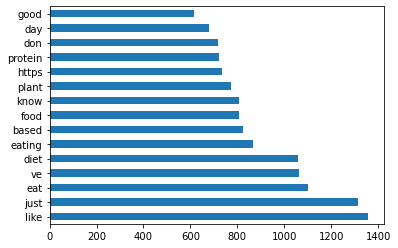

In [24]:
selftext_df.sum().sort_values(ascending=False).head(15).plot(kind='barh');

In [25]:
cvec = CountVectorizer(stop_words=["english"], min_df=3, ngram_range=(2,2))
cvec.fit(explore['selftext'])
selftext_cv = cvec.transform(explore['selftext'])
selftext_df = pd.DataFrame(selftext_cv.todense(), columns=cvec.get_feature_names_out())

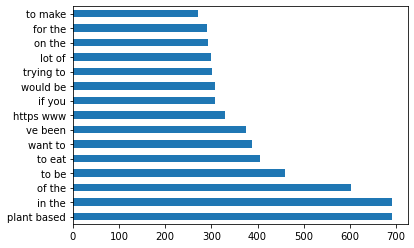

In [26]:
selftext_df.sum().sort_values(ascending=False).head(15).plot(kind='barh');

### Cleaning Text

In [27]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer 

In [28]:
## creating functions to clean the selftext column
## taken from towards data science website post

def remove_stopwords(text):
    stop_words = set(stopwords.words('english')) 
    words = word_tokenize( text.lower() ) 
    sentence = [w for w in words if not w in stop_words]
    return " ".join(sentence)

In [29]:
def lemmatize_text(text):
    wordlist=[]
    lemmatizer = WordNetLemmatizer() 
    sentences=sent_tokenize(text)
    for sentence in sentences:
        words=word_tokenize(sentence)
        for word in words:
            wordlist.append(lemmatizer.lemmatize(word))
    return ' '.join(wordlist) 

In [30]:
import string

def clean_txt(text): 
    delete_dict = {sp_character: '' for sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr]) 
    
    return text2.lower()

In [31]:
combined_df.head()

id       subreddit                                           selftext  \
0  r67ky9  PlantBasedDiet  I am a 32 year old man and I keep trying to im...   
1  r5slcs  PlantBasedDiet  I'm looking to transition to a plant-based die...   
2  r5o90n  PlantBasedDiet  I promised to myself to switch to a more whole...   
3  r5ebza  PlantBasedDiet  I certainly don’t want to start any controvers...   
4  r59uc9  PlantBasedDiet    I started a WFPB diet a month ago after I wa...   

                                               title  label  
0  How can I stay full on a plant based diet? Wit...      1  
1  How do you navigate around people that don't e...      1  
2  Tips &amp; Tricks for preparation/conservation...      1  
3           Clearing up confusion about oil + recipe      1  
4                    Ex - low carb in need of advice      1

In [32]:
clean_text = combined_df[['label', 'selftext']]

In [33]:
clean_text['selftext'] = clean_text['selftext'].apply(remove_stopwords)

/var/folders/nb/q3q3zfsd19q43ntlzbsrbd3h0000gn/T/ipykernel_89443/4021678352.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_text['selftext'] = clean_text['selftext'].apply(remove_stopwords)


In [34]:
clean_text['selftext'] = clean_text['selftext'].copy().apply(lemmatize_text)

/var/folders/nb/q3q3zfsd19q43ntlzbsrbd3h0000gn/T/ipykernel_89443/1994545521.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_text['selftext'] = clean_text['selftext'].copy().apply(lemmatize_text)


In [35]:
clean_text['selftext'] = clean_text['selftext'].apply(clean_txt)

/var/folders/nb/q3q3zfsd19q43ntlzbsrbd3h0000gn/T/ipykernel_89443/3616041809.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_text['selftext'] = clean_text['selftext'].apply(clean_txt)


In [36]:
cvec = CountVectorizer(stop_words=["english"], min_df=3, ngram_range=(1,3))
cvec.fit(clean_text['selftext'])
cleaned_cv = cvec.transform(clean_text['selftext'])
cleaned_df = pd.DataFrame(cleaned_cv.todense(), columns=cvec.get_feature_names_out())

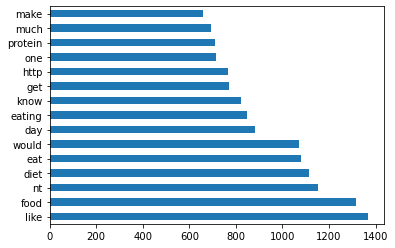

In [37]:
## using one word
cleaned_df.sum().sort_values(ascending=False).head(15).plot(kind='barh');

In [38]:
cvec = CountVectorizer(stop_words=["english"], min_df=3, ngram_range=(2,2))
cvec.fit(clean_text['selftext'])
cleaned_cv = cvec.transform(clean_text['selftext'])
cleaned_df = pd.DataFrame(cleaned_cv.todense(), columns=cvec.get_feature_names_out())

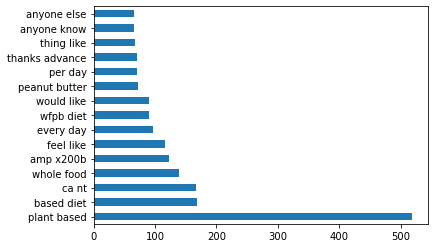

In [39]:
cleaned_df.sum().sort_values(ascending=False).head(15).plot(kind='barh');

### Looking at the plant based diet subreddit

In [41]:
plants = clean_text[clean_text['label'] == 1]

In [42]:
### Looking at the 15 most common words in the plant based dataframe 

cvec = CountVectorizer(stop_words=["english"], min_df=3, ngram_range=(1,3))
cvec.fit(plants['selftext'])
plants_cv = cvec.transform(plants['selftext'])
plants_df = pd.DataFrame(plants_cv.todense(), columns=cvec.get_feature_names_out())

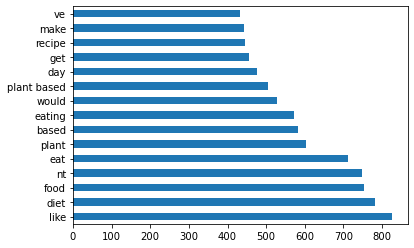

In [43]:
## using one word
plants_df.sum().sort_values(ascending=False).head(15).plot(kind='barh');

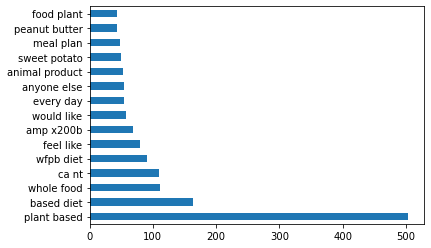

In [44]:
cvec = CountVectorizer(stop_words=["english"], min_df=3, ngram_range=(2,2))
cvec.fit(plants['selftext'])
plants_cv = cvec.transform(plants['selftext'])
plants_df = pd.DataFrame(plants_cv.todense(), columns=cvec.get_feature_names_out())

plants_df.sum().sort_values(ascending=False).head(15).plot(kind='barh');

### Looking at nutrition subreddit

In [45]:
nutrition = clean_text[clean_text['label'] == 0]

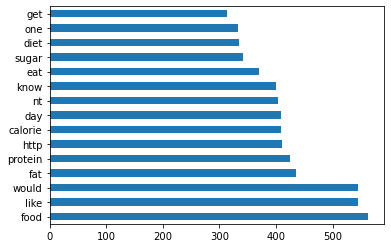

In [46]:
cvec = CountVectorizer(stop_words=["english"], min_df=3, ngram_range=(1,3))
cvec.fit(nutrition['selftext'])
nutrition_cv = cvec.transform(nutrition['selftext'])
nutrition_df = pd.DataFrame(nutrition_cv.todense(), columns=cvec.get_feature_names_out())

nutrition_df.sum().sort_values(ascending=False).head(15).plot(kind='barh');

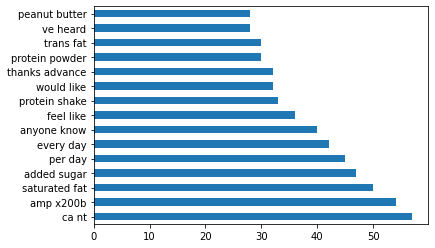

In [47]:
cvec = CountVectorizer(stop_words=["english"], min_df=3, ngram_range=(2,2))
cvec.fit(nutrition['selftext'])
nutrition_cv = cvec.transform(nutrition['selftext'])
nutrition_df = pd.DataFrame(nutrition_cv.todense(), columns=cvec.get_feature_names_out())

nutrition_df.sum().sort_values(ascending=False).head(15).plot(kind='barh');

## Modeling

Setting up data for modeling:
    
   - `X` will be the `selftext` column.
   - `y` will be the `label` column.

In [55]:
## re-naming the selftext column to clean_selftext so I can add it to the original DF to run models

clean_text.rename(columns={'selftext':'cleaned_selftext'}, inplace=True)

/Users/brianna/miniforge3/envs/tf/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [56]:
X = clean_text['cleaned_selftext']
y = clean_text['label']

In [57]:
## remember to stratify y to keep porportions the same
# Split the data into the training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,                            
                                                    stratify=y,
                                                    random_state=42)

In [58]:
## setting up a pipeline

cvec_pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('rf', RandomForestClassifier())
])


pipe_params_cvec= {
        'cvec__max_features' : [2100],
        'cvec__ngram_range' : [(1, 3)],
        'cvec__min_df' : [5],
        'rf__n_estimators': [70,80,90],
        'rf__max_depth': [None,12,14,16,18],
        'rf__ccp_alpha': [0],
        'rf__min_samples_leaf':[1,5,10,20],
        'rf__max_features':['auto','log2']
        
}


# Instantiate GridSearchCV.
gs_cvec= GridSearchCV(cvec_pipe,
                      param_grid=pipe_params_cvec,
                      cv=5,
                      verbose=2)
                      

# Fit GridSearch to training data.
gs_cvec.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV] END cvec__max_features=2100, cvec__min_df=5, cvec__ngram_range=(1, 3), rf__ccp_alpha=0, rf__max_depth=None, rf__max_features=auto, rf__min_samples_leaf=1, rf__n_estimators=70; total time=   0.5s
[CV] END cvec__max_features=2100, cvec__min_df=5, cvec__ngram_range=(1, 3), rf__ccp_alpha=0, rf__max_depth=None, rf__max_features=auto, rf__min_samples_leaf=1, rf__n_estimators=70; total time=   0.5s
[CV] END cvec__max_features=2100, cvec__min_df=5, cvec__ngram_range=(1, 3), rf__ccp_alpha=0, rf__max_depth=None, rf__max_features=auto, rf__min_samples_leaf=1, rf__n_estimators=70; total time=   0.5s
[CV] END cvec__max_features=2100, cvec__min_df=5, cvec__ngram_range=(1, 3), rf__ccp_alpha=0, rf__max_depth=None, rf__max_features=auto, rf__min_samples_leaf=1, rf__n_estimators=70; total time=   0.5s
[CV] END cvec__max_features=2100, cvec__min_df=5, cvec__ngram_range=(1, 3), rf__ccp_alpha=0, rf__max_depth=None, rf__max_features=auto, r

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('rf', RandomForestClassifier())]),
             param_grid={'cvec__max_features': [2100], 'cvec__min_df': [5],
                         'cvec__ngram_range': [(1, 3)], 'rf__ccp_alpha': [0],
                         'rf__max_depth': [None, 12, 14, 16, 18],
                         'rf__max_features': ['auto', 'log2'],
                         'rf__min_samples_leaf': [1, 5, 10, 20],
                         'rf__n_estimators': [70, 80, 90]},
             verbose=2)

In [59]:
gs_cvec.best_score_

0.8020113505784936

In [60]:
## Score model on training set. Model_1
print(gs_cvec.score(X_train, y_train))

0.9995814148179154


In [61]:
## Score model on testing set. Model_1
print(gs_cvec.score(X_test, y_test))

0.7969413763806287


In [62]:
## for model_1
gs_cvec.best_params_

{'cvec__max_features': 2100,
 'cvec__min_df': 5,
 'cvec__ngram_range': (1, 3),
 'rf__ccp_alpha': 0,
 'rf__max_depth': None,
 'rf__max_features': 'log2',
 'rf__min_samples_leaf': 1,
 'rf__n_estimators': 80}

In [63]:
#model_1
d_clean_1 = {'predicted': gs_cvec.predict(X_test), 'actual':y_test}

In [64]:
df_cleaned_1 = pd.DataFrame(data=d_clean_1)
df_cleaned_1

predicted  actual
1377          1       1
967           0       1
1546          1       1
898           0       1
284           0       0
...         ...     ...
1194          1       0
1832          0       0
26            1       0
283           0       0
1561          0       0

[1177 rows x 2 columns]

In [65]:
# Find all indices where predicted and true results aren't the same, then save in an array.
incorrect_ids = df_cleaned_1[df_cleaned_1['predicted'] != df_cleaned_1['actual']]
incorrect_ids

predicted  actual
967           0       1
898           0       1
1100          0       1
564           1       0
1026          0       1
...         ...     ...
281           0       1
1867          1       0
1337          1       0
1194          1       0
26            1       0

[239 rows x 2 columns]

### Second Model_Voting Classifier

In [66]:
cvec = CountVectorizer(max_features=2100, min_df= 5)
cvec.fit(X_train)

CountVectorizer(max_features=2100, min_df=5)

In [67]:
X_train = cvec.transform(X_train)
X_test = cvec.transform(X_test)

In [68]:
log_clf = LogisticRegression(max_iter=5000)
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

In [71]:
vote_clf = VotingClassifier([
            ('lr', log_clf),
            ('rf',rnd_clf), 
            ('svc', svm_clf)], voting='hard')

params = {
     'svc__C':np.linspace(0.01, 5),
    'svc__kernel':['rbf', 'poly'],
    'svc__degree':[1,2]
}

## Instantiate a GridSearch
gs_vc = GridSearchCV(estimator=vote_clf, param_grid = params, cv=3, verbose=1)

## Fit GS on training data.
gs_vc.fit(X_train, y_train)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


GridSearchCV(cv=3,
             estimator=VotingClassifier(estimators=[('lr',
                                                     LogisticRegression(max_iter=5000)),
                                                    ('rf',
                                                     RandomForestClassifier()),
                                                    ('svc', SVC())]),
             param_grid={'svc__C': array([0.01      , 0.11183673, 0.21367347, 0.3155102 , 0.41734694,
       0.51918367, 0.62102041, 0.72285714, 0.82469388, 0.92653061,
       1.02836735, 1.13020408, 1.23204082, 1.33387755, 1.43571429,
       1.53755102, 1.63938...
       2.04673469, 2.14857143, 2.25040816, 2.3522449 , 2.45408163,
       2.55591837, 2.6577551 , 2.75959184, 2.86142857, 2.96326531,
       3.06510204, 3.16693878, 3.26877551, 3.37061224, 3.47244898,
       3.57428571, 3.67612245, 3.77795918, 3.87979592, 3.98163265,
       4.08346939, 4.18530612, 4.28714286, 4.38897959, 4.49081633,
       4.59265306, 4.69

In [73]:
gs_vc.best_score_

0.8053604492558989

In [74]:
gs_svc.score(X_train, y_train)

0.9794893260778569

In [75]:
gs_svc.score(X_test, y_test)

0.816482582837723

In [76]:
gs_svc.best_params_

{'svc__C': 0.31551020408163266, 'svc__degree': 1, 'svc__kernel': 'poly'}

In [80]:
for clf in (log_clf, rnd_clf,svm_clf):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(f'{clf}: {accuracy_score(y_test,y_pred)}')

LogisticRegression(max_iter=5000): 0.8088360237892949
RandomForestClassifier(): 0.8011894647408666
SVC(): 0.7901444350042481


In [81]:
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

In [82]:
print(f"True Neg: {tn}")
print(f"False Pos: {fp}")
print(f"False Neg: {fn}")
print(f"True Pos: {tp}")

True Neg: 544
False Pos: 88
False Neg: 159
True Pos: 386


In [85]:
from sklearn.metrics import ConfusionMatrixDisplay

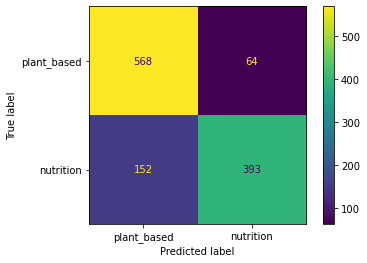

In [91]:
ConfusionMatrixDisplay.from_estimator(gs_svc,X_test,y_test,display_labels=['plant_based','nutrition'] );